In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [ ]:
# 1. Завантаження даних


df = pd.read_csv('Iris.csv')

# Бінарна цільова змінна (як у Task2)
y = (df['PetalLengthCm'] > df['PetalLengthCm'].median()).astype(int)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']]

# Розбиття на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Масштабування
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 2. Створення моделей


models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

=== Logistic Regression ===
Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.88      0.93      0.90        15

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



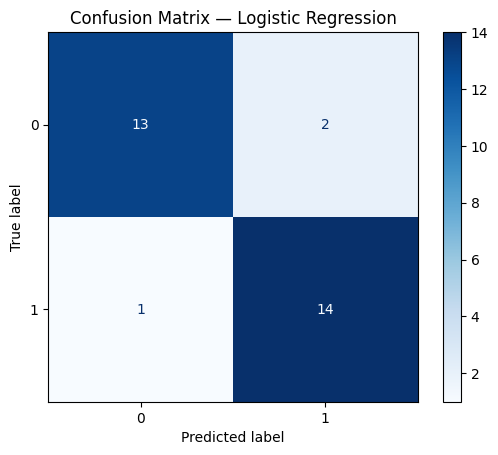

=== Decision Tree ===
Accuracy: 0.867
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.82      0.93      0.88        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



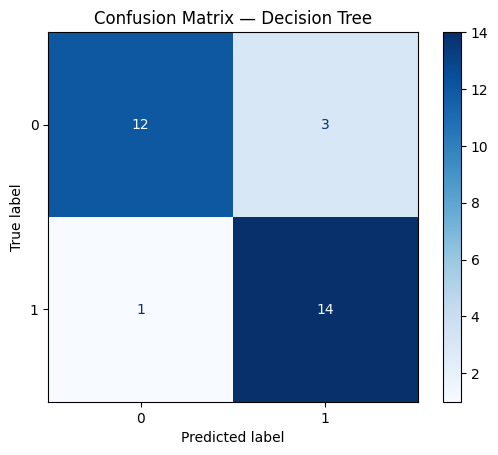

=== Random Forest ===
Accuracy: 0.867
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.82      0.93      0.88        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



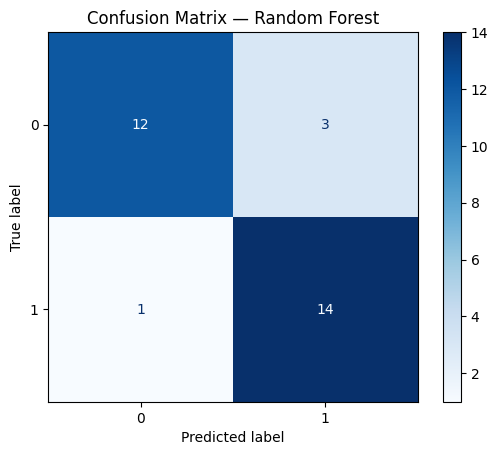

In [ ]:
# 3. Тренування, передбачення та оцінка


for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"=== {name} ===")
    print("Accuracy:", round(acc, 3))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Матриця плутанини
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix — {name}")
    plt.show()
    
    results[name] = (model, y_pred)


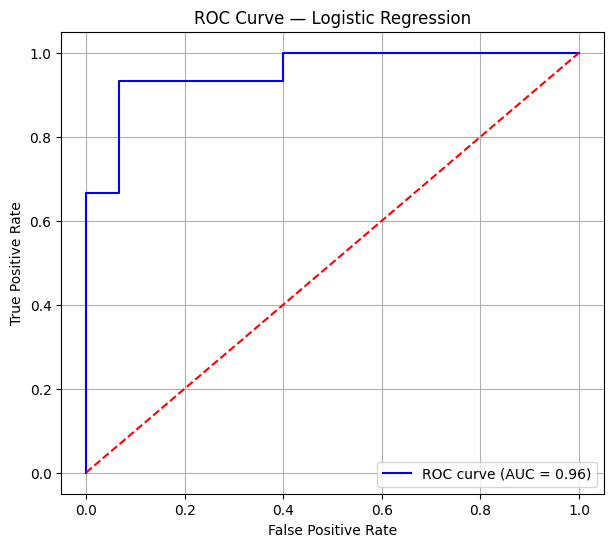

In [ ]:
# 4. ROC-крива та AUC (тільки для Logistic Regression)


logreg_model = results["Logistic Regression"][0]
y_proba = logreg_model.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


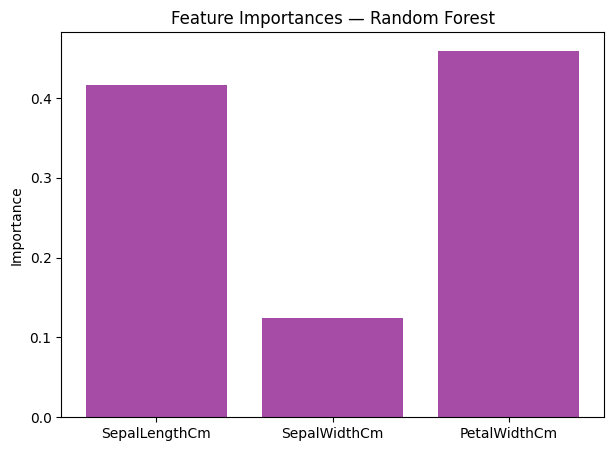

In [ ]:
# 5. Важливість ознак (для Random Forest)

rf_model = results["Random Forest"][0]
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(7,5))
plt.bar(features, importances, color='purple', alpha=0.7)
plt.title("Feature Importances — Random Forest")
plt.ylabel("Importance")
plt.show()
